In [ ]:
from google.colab import files
files.upload()

데이터 불러오기
--

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

gender_submission=pd.read_csv('gender_submission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [85]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [87]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [90]:
gender_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [91]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- Age, Carbin 에 결측치가 많다.

train의 경우 이외에도

- Embarked에 결측치가 2개

test의 경우 이외에도

- Fare에도 결측치가 1개가 존재

In [93]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(train.Name)
train.Name=le.fit_transform(train.Name)

In [94]:
le.fit(test.Name)
test.Name=le.fit_transform(test.Name)

In [95]:
le.fit(train.Sex)
train.Sex=le.fit_transform(train.Sex)

In [96]:
le.fit(test.Sex)
test.Sex=le.fit_transform(test.Sex)

In [97]:
le.fit(train.Ticket)
train.Ticket=le.fit_transform(train.Ticket)

In [98]:
le.fit(test.Ticket)
test.Ticket=le.fit_transform(test.Ticket)

결측치가 있는 Cabin의 경우 결측치를 NaN으로 string형식으로 해준다.

In [101]:
train.Cabin=train.Cabin.fillna('NaN')

In [102]:
test.Cabin=test.Cabin.fillna('NaN')

In [103]:
le.fit(train.Cabin)
train.Cabin=le.fit_transform(train.Cabin)

le.fit(test.Cabin)
test.Cabin=le.fit_transform(test.Cabin)

In [105]:
train.Embarked=train.Embarked.fillna('NaN')
test.Embarked=test.Embarked.fillna('NaN')

In [106]:
le.fit(train.Embarked)
train.Embarked=le.fit_transform(train.Embarked)

le.fit(test.Embarked)
test.Embarked=le.fit_transform(test.Embarked)

In [107]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [108]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int64  
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [109]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [111]:
age_mean=train.Age.mean()

In [113]:
train=train.fillna(age_mean)

In [114]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [115]:
test_age=test.Age.mean()

In [116]:
test.Age=test.Age.fillna(test_age)

In [118]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [119]:
test.Fare=test.Fare.fillna(0)

In [120]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [122]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

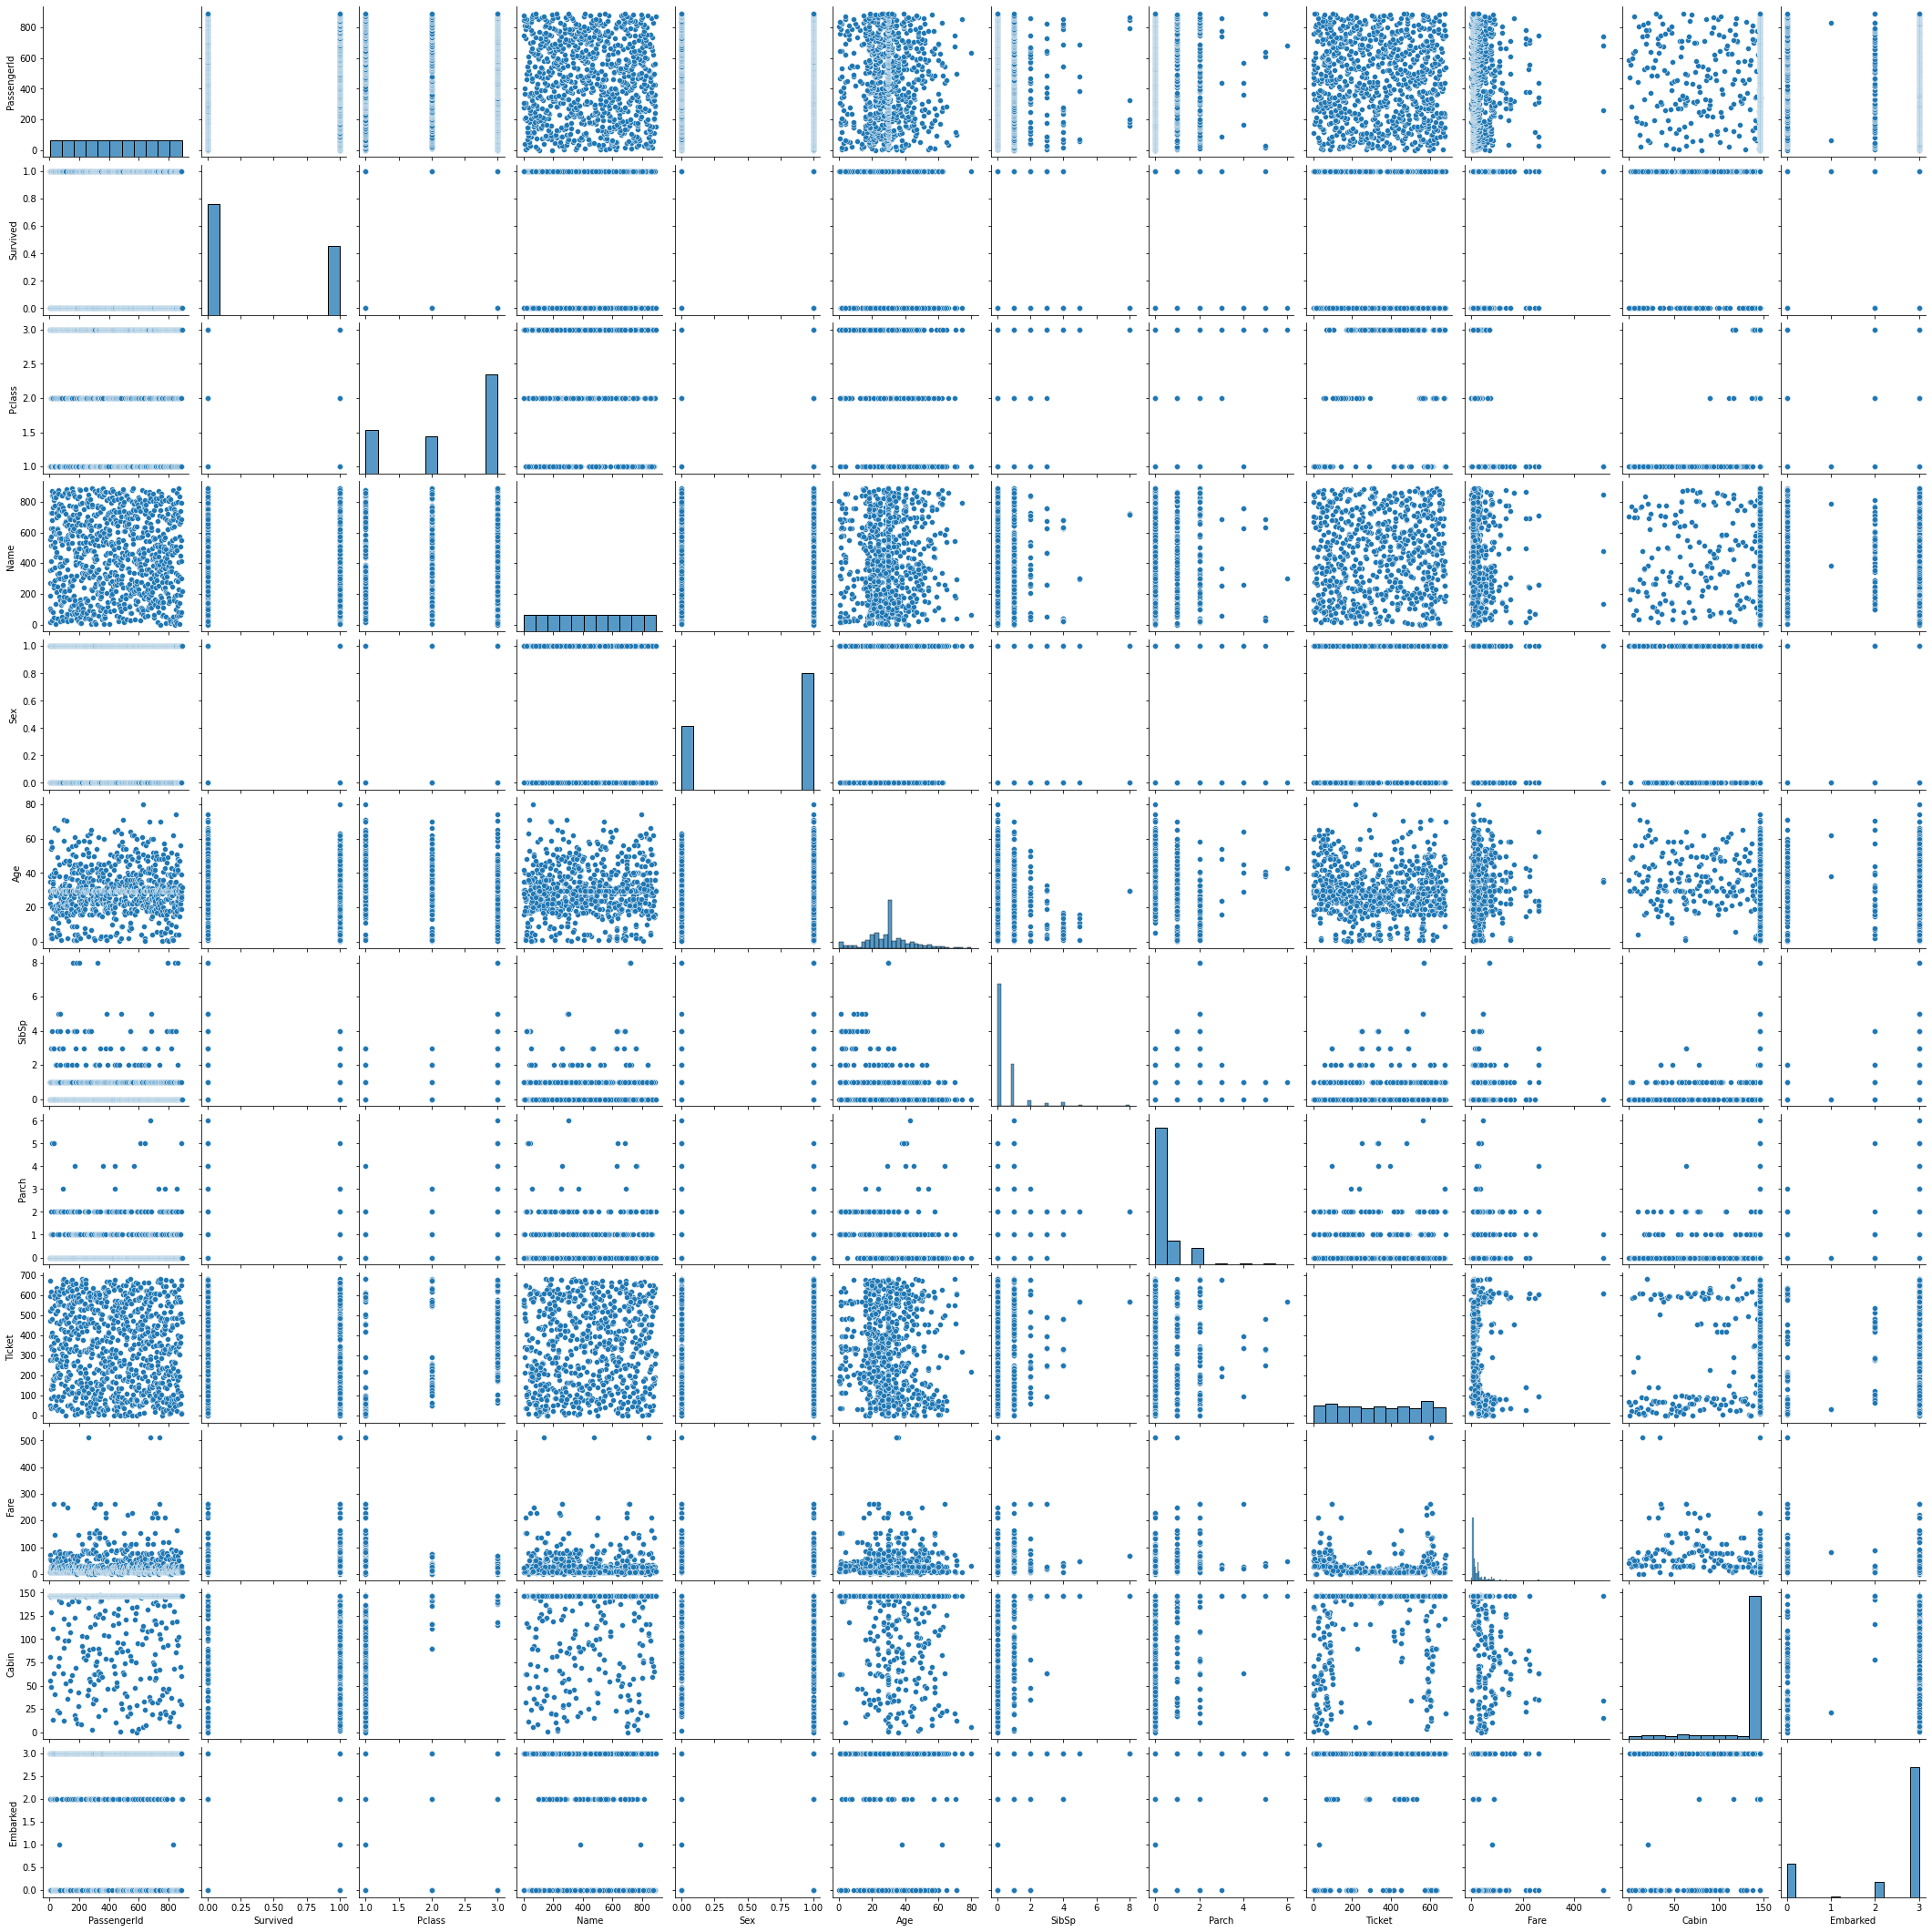

In [123]:
sns.pairplot(data=train)

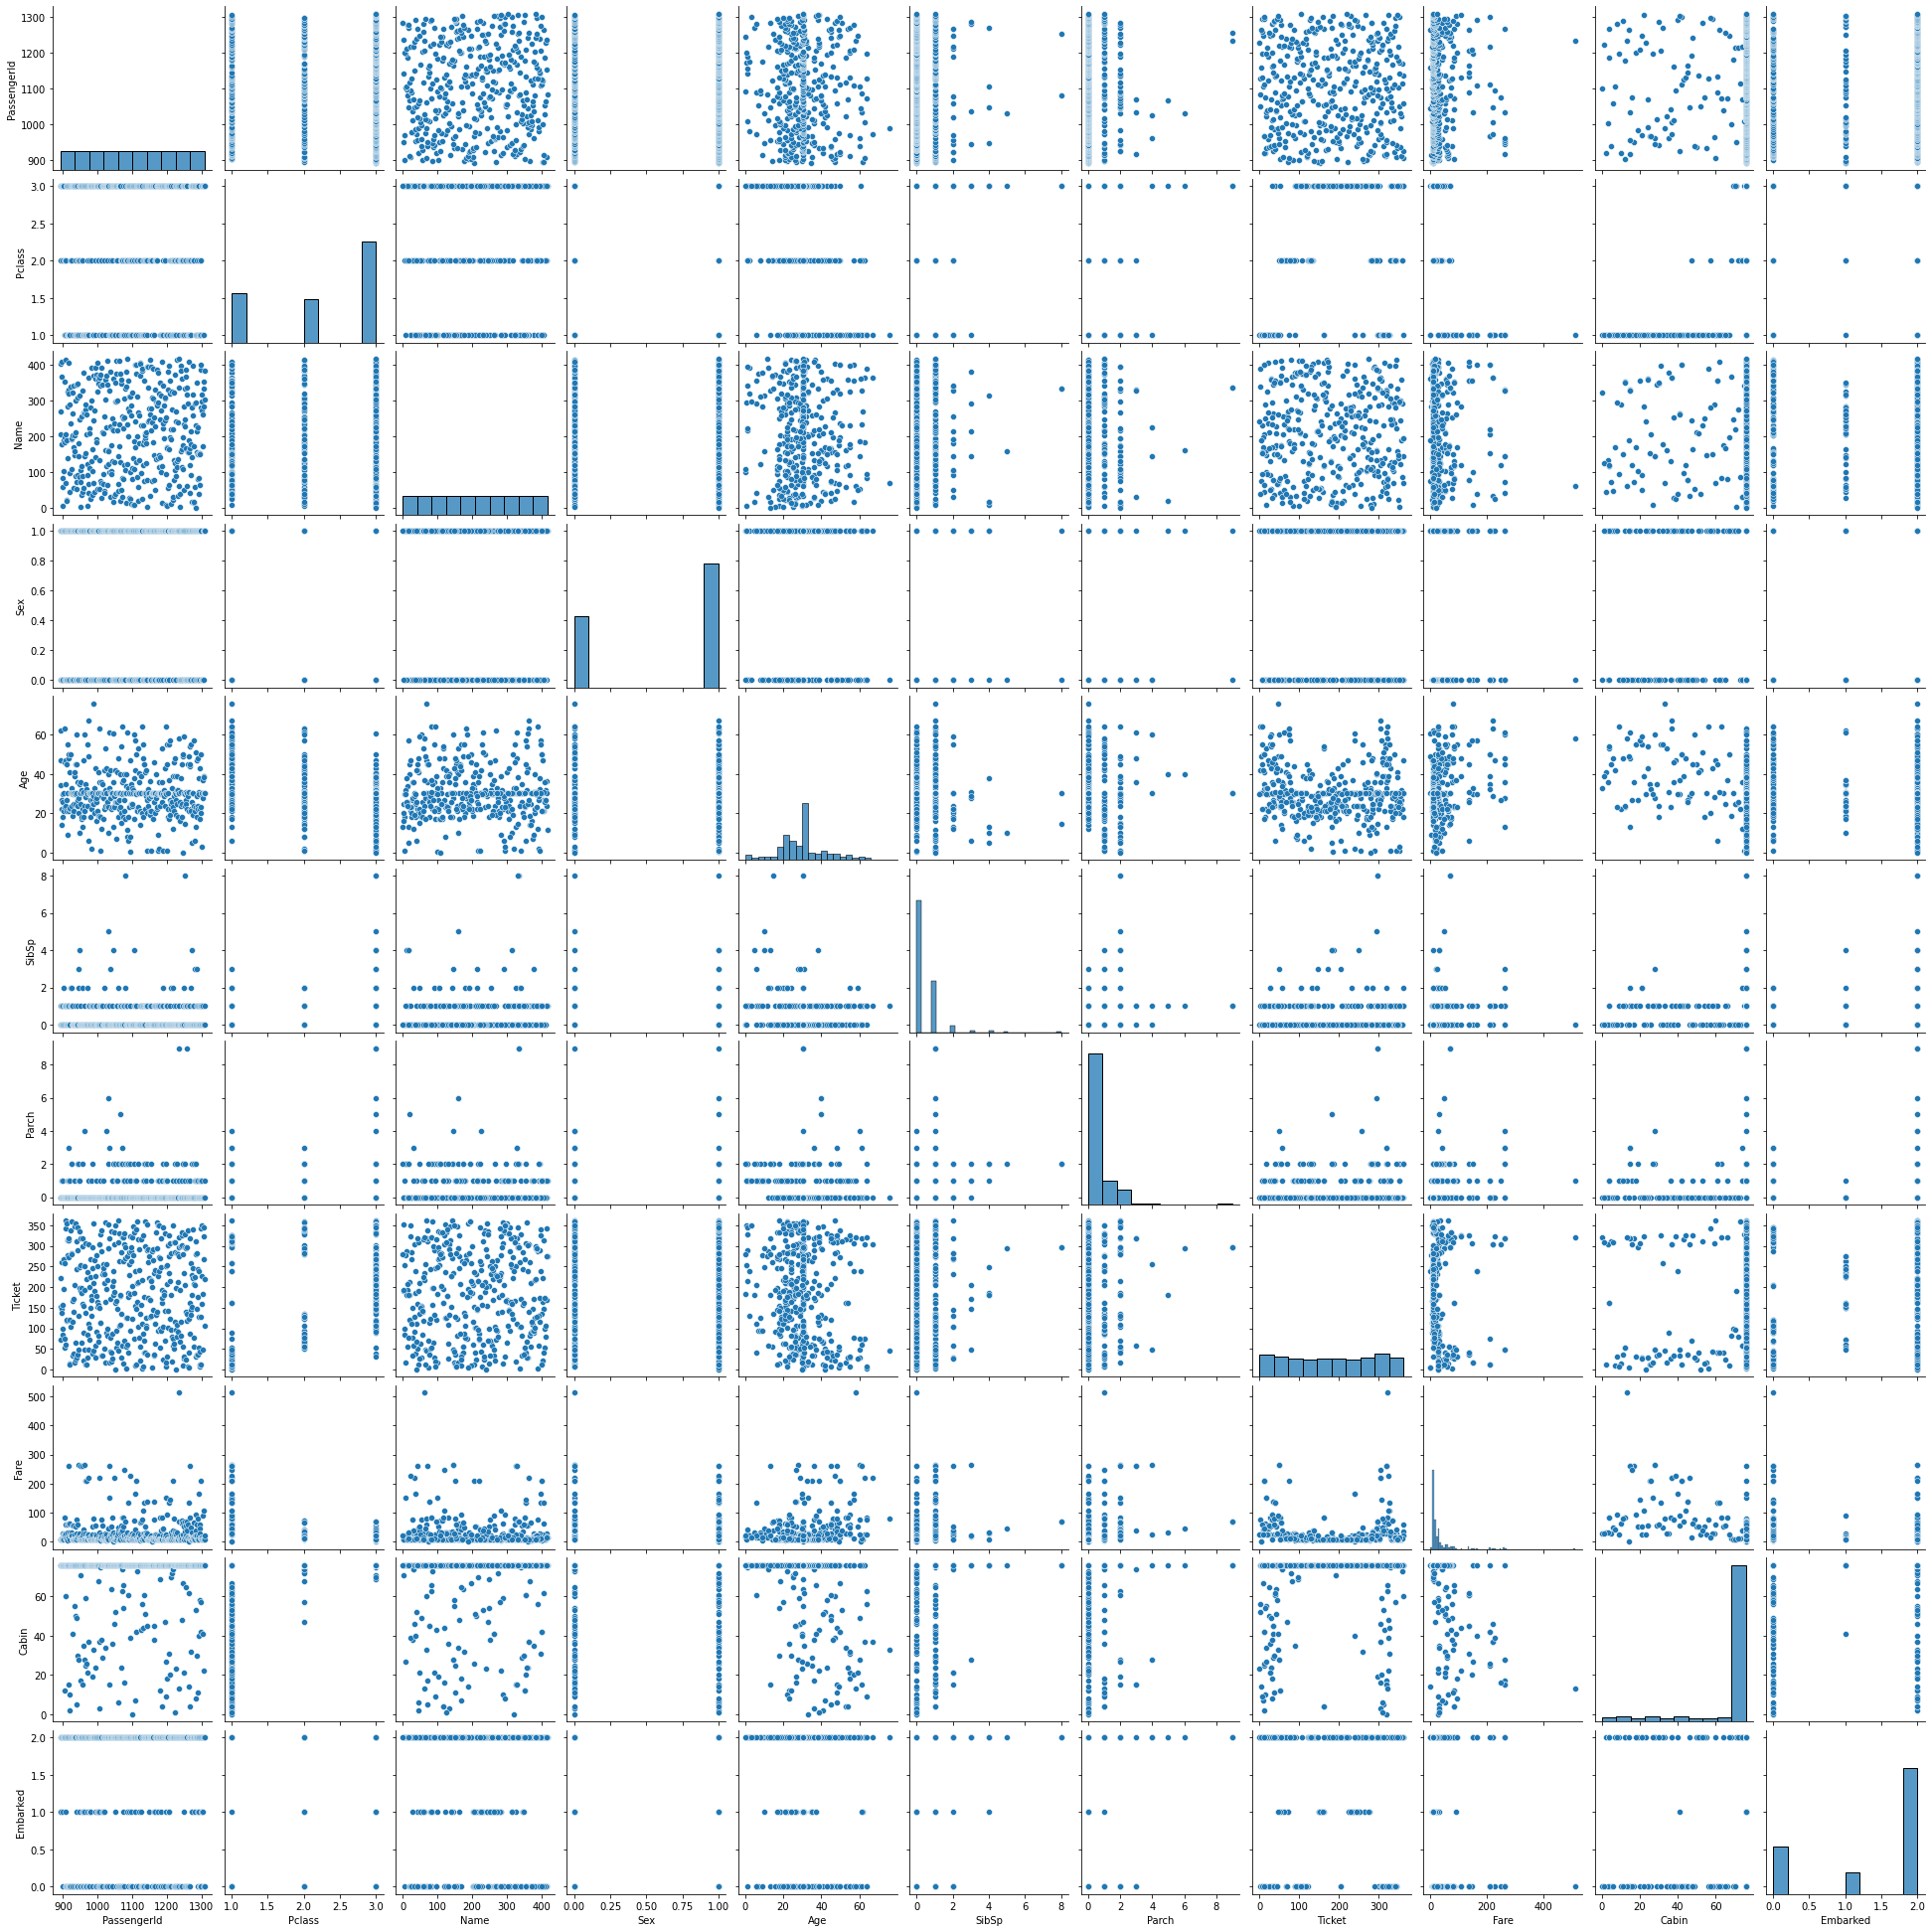

In [125]:
sns.pairplot(data=test)

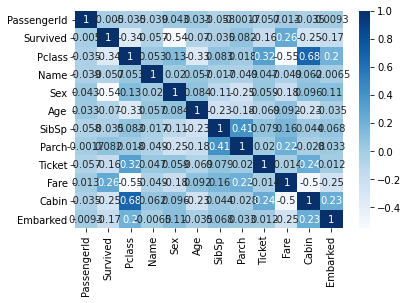

In [417]:
sns.heatmap(data=train.corr(), annot=True, cmap='Blues')

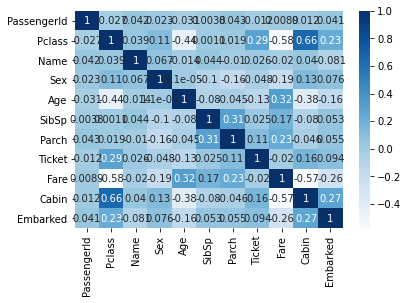

In [414]:
sns.heatmap(data=test.corr(), annot=True, cmap='Blues')

분포 및 이상치 확인
--

- 빨간 색: train

- 파란 색: test

Passengerid
--

In [275]:
len(train.PassengerId.unique())

891

In [411]:
len(test.PassengerId.unique())

418

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


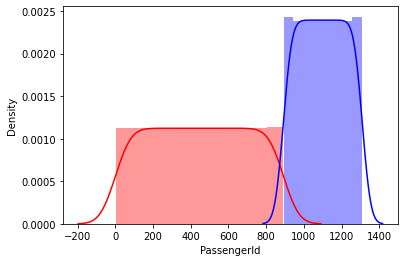

In [427]:
sns.distplot(train.PassengerId, color='red')
sns.distplot(test.PassengerId, color='blue')

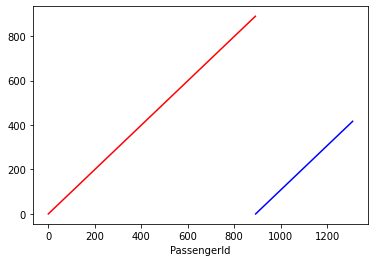

In [428]:
sns.lineplot(data=train, x='PassengerId', y=train.index, color='red')
sns.lineplot(data=test, x='PassengerId', y=test.index, color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


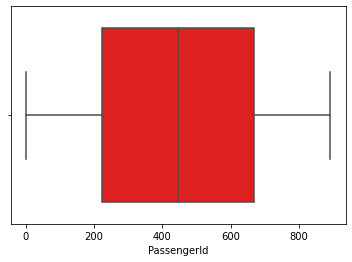

In [431]:
sns.boxplot(train.PassengerId, color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


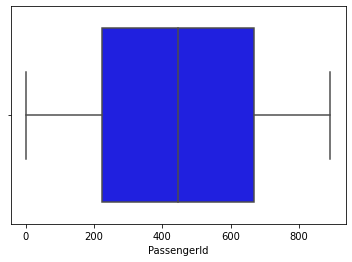

In [430]:
sns.boxplot(train.PassengerId, color='blue')

Pclass
--

In [432]:
len(train.Pclass.unique())

3

In [433]:
len(test.Pclass.unique())

3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


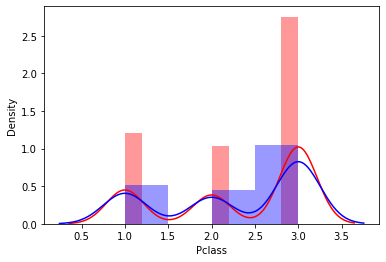

In [434]:
sns.distplot(train.Pclass, color='red')
sns.distplot(test.Pclass, color='blue')

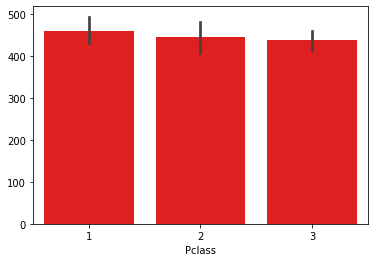

In [437]:
sns.barplot(data=train, x="Pclass", y=train.index, color='red')

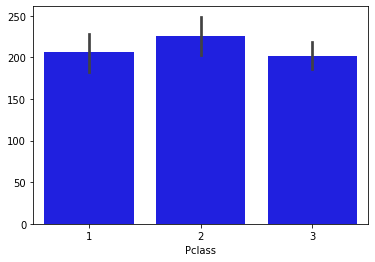

In [438]:
sns.barplot(data=test, x="Pclass", y=test.index, color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


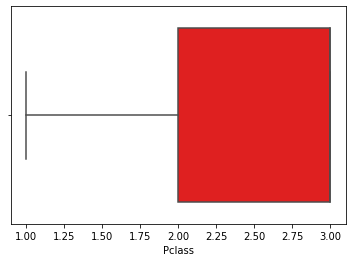

In [436]:
sns.boxplot(train.Pclass, color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


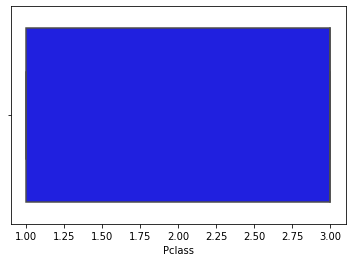

In [439]:
sns.boxplot(test.Pclass, color='blue')

sex
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


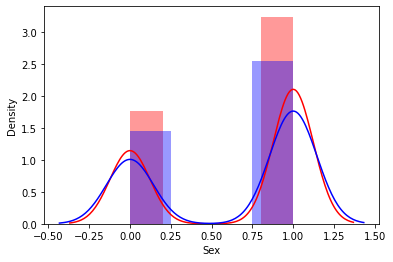

In [442]:
sns.distplot(train.Sex, color='red')
sns.distplot(test.Sex, color='blue')

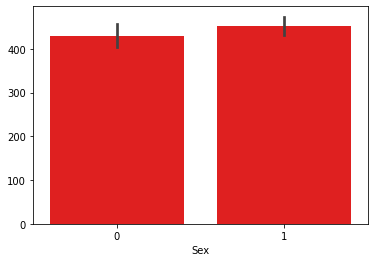

In [441]:
sns.barplot(data=train, x="Sex", y=train.index, color='red')

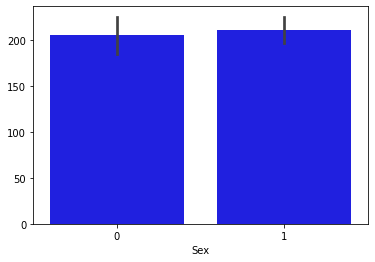

In [443]:
sns.barplot(data=test, x="Sex", y=test.index, color='blue')

age
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


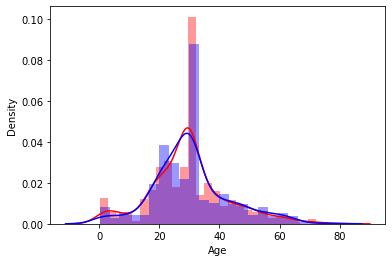

In [445]:
sns.distplot(train.Age, color='red')
sns.distplot(test.Age, color='blue')

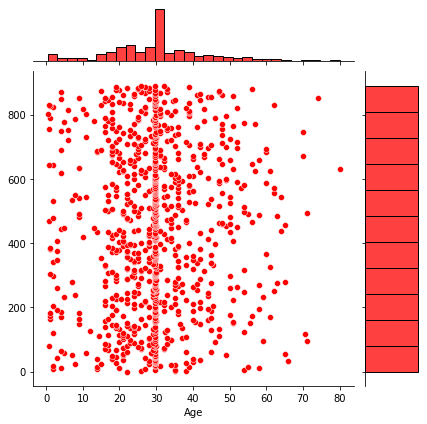

In [446]:
sns.jointplot(data=train, x="Age", y=train.index, color='red')

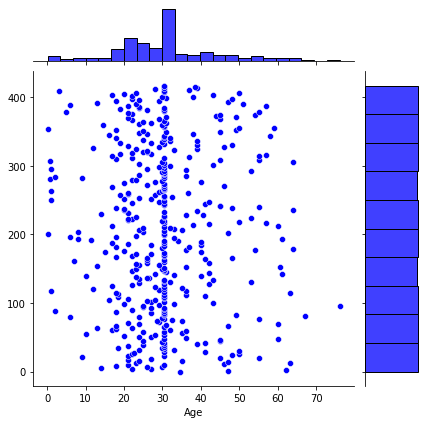

In [447]:
sns.jointplot(data=test, x="Age", y=test.index, color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


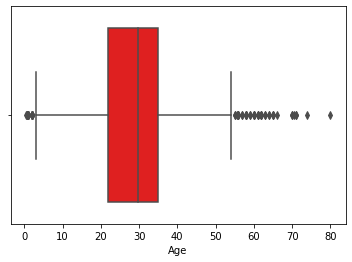

In [448]:
sns.boxplot(train.Age, color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


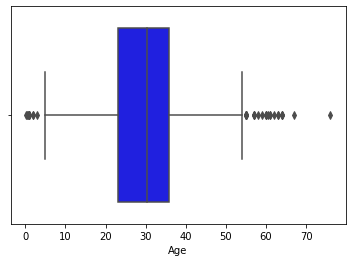

In [449]:
sns.boxplot(test.Age, color='blue')

SibSp
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


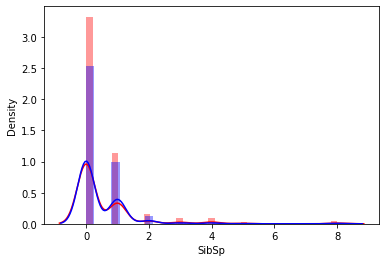

In [451]:
sns.distplot(train.SibSp, color='red')
sns.distplot(test.SibSp, color='blue')

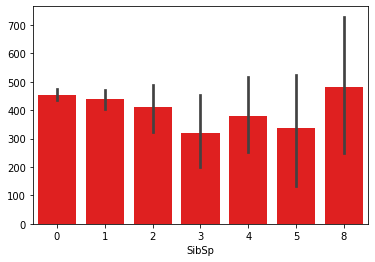

In [452]:
sns.barplot(data=train, x="SibSp", y=train.index, color='red')

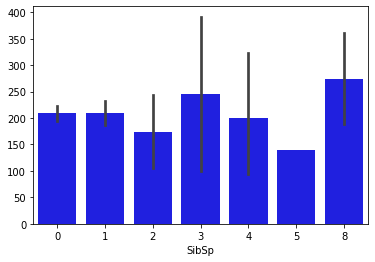

In [454]:
sns.barplot(data=test, x="SibSp", y=test.index, color='blue')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


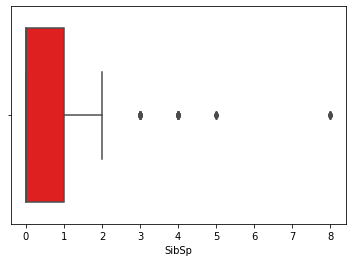

In [455]:
sns.boxplot(train.SibSp, color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


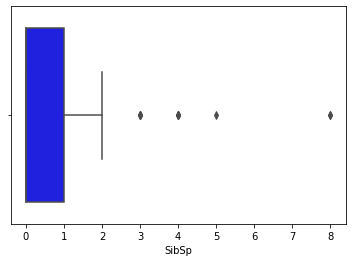

In [456]:
sns.boxplot(test.SibSp, color='blue')

Parch
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


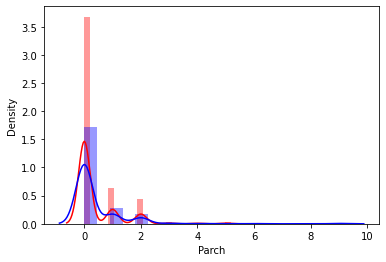

In [457]:
sns.distplot(train.Parch, color='red')
sns.distplot(test.Parch, color='blue')

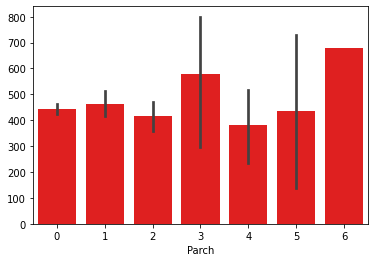

In [458]:
sns.barplot(data=train, x="Parch", y=train.index, color='red')

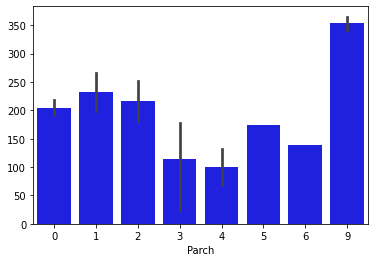

In [460]:
sns.barplot(data=test, x="Parch", y=test.index, color='blue')

Ticket
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


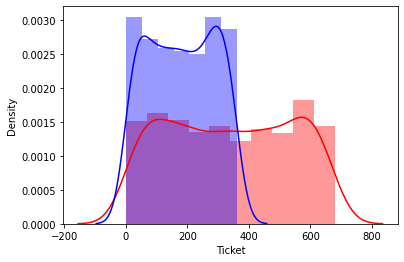

In [462]:
sns.distplot(train.Ticket, color='red')
sns.distplot(test.Ticket, color='blue')

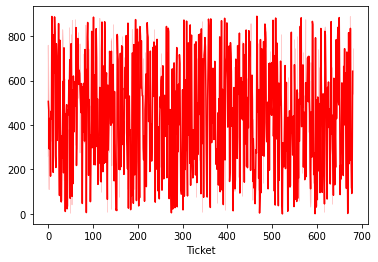

In [463]:
sns.lineplot(data=train, x='Ticket', y=train.index, color='red')

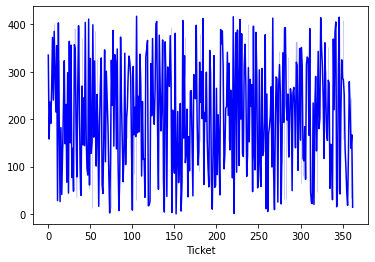

In [464]:
sns.lineplot(data=test, x='Ticket', y=test.index, color='blue')

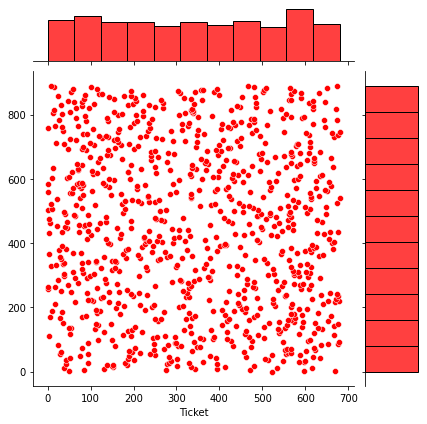

In [465]:
sns.jointplot(data=train, x="Ticket", y=train.index, color='red')

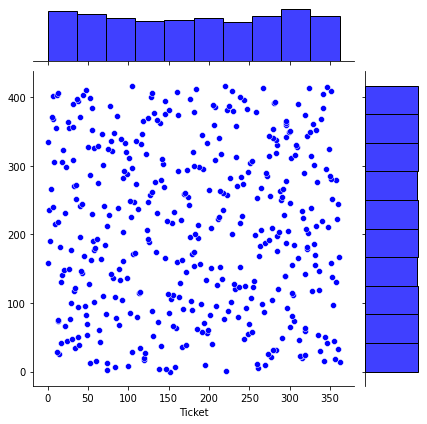

In [466]:
sns.jointplot(data=test, x="Ticket", y=test.index, color='blue')

Fare
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


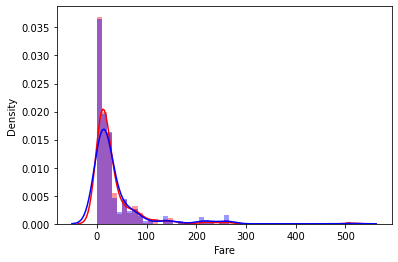

In [467]:
sns.distplot(train.Fare, color='red')
sns.distplot(test.Fare, color='blue')

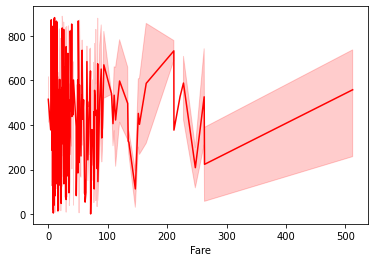

In [468]:
sns.lineplot(data=train, x='Fare', y=train.index, color='red')

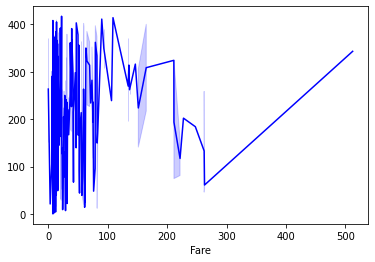

In [469]:
sns.lineplot(data=test, x='Fare', y=test.index, color='blue')

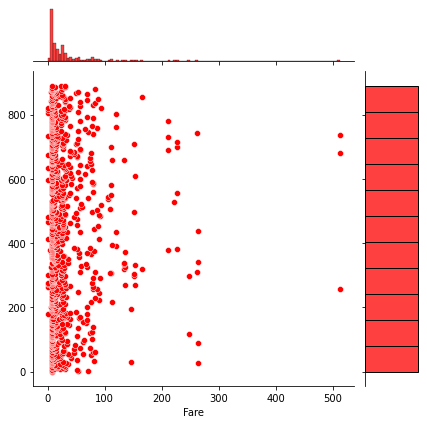

In [470]:
sns.jointplot(data=train, x="Fare", y=train.index, color='red')

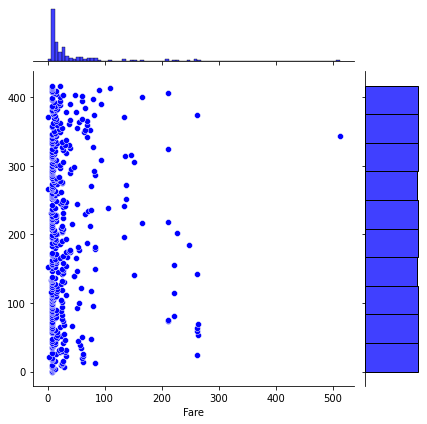

In [472]:
sns.jointplot(data=test, x="Fare", y=test.index, color='blue')

Cabin
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


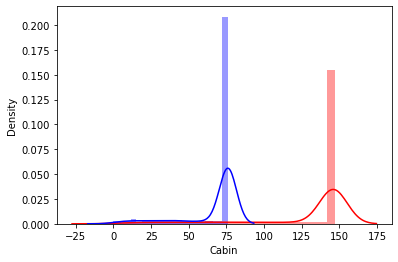

In [474]:
sns.distplot(train.Cabin, color='red')
sns.distplot(test.Cabin, color='blue')

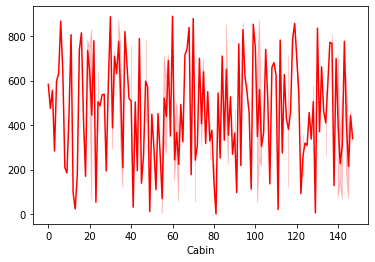

In [475]:
sns.lineplot(data=train, x='Cabin', y=train.index, color='red')

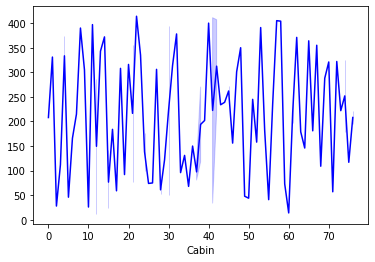

In [476]:
sns.lineplot(data=test, x='Cabin', y=test.index, color='blue')

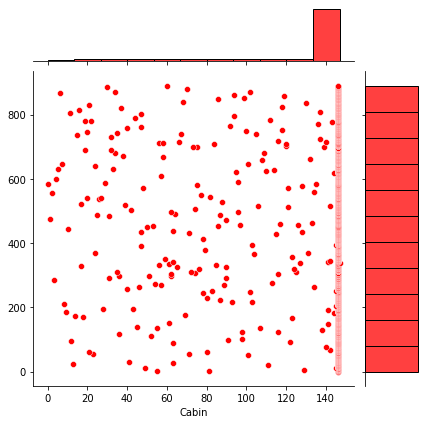

In [477]:
sns.jointplot(data=train, x="Cabin", y=train.index, color='red')

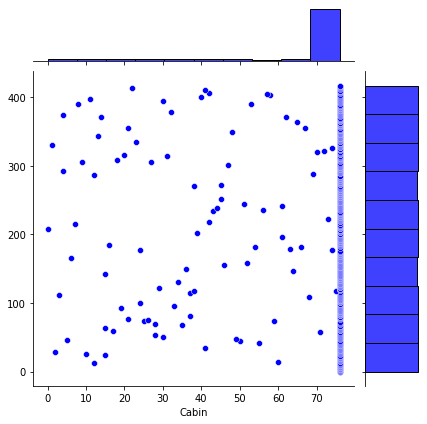

In [478]:
sns.jointplot(data=test, x="Cabin", y=test.index, color='blue')

Embarked
--

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


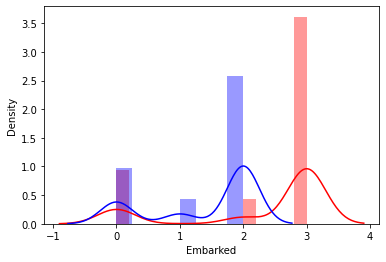

In [479]:
sns.distplot(train.Embarked, color='red')
sns.distplot(test.Embarked, color='blue')

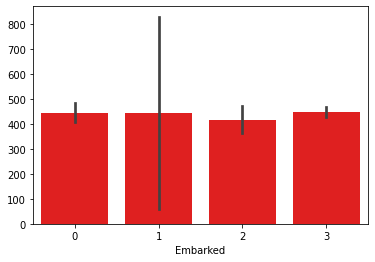

In [480]:
sns.barplot(data=train, x="Embarked", y=train.index, color='red')

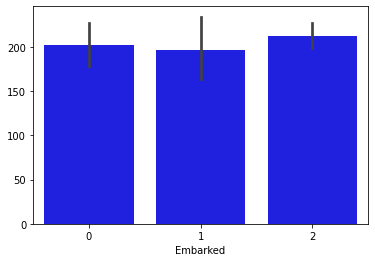

In [481]:
sns.barplot(data=test, x="Embarked", y=test.index, color='blue')

분포가 굉장히 엉망이다.
--

범주형인 칼럼도 많고,

train과 test의 분포가 같지 않은 칼럼도 있으며, 이상치도 존재하고, 분포도 각각 다르다. 이대로 머신러닝에 적용시켜주면, 정확도가 떨어질 거 같으니, 우선 딥러닝을 적용해본 뒤, 머신러닝을 적용하기로 한다.

딥러닝 적용
--

In [369]:
import keras
import tensorflow as tf
from keras import Sequential

In [370]:
from keras.layers import Dense
from keras.layers import Activation

In [392]:
x_train=train.drop(['Survived'], axis=1)
y_train=train['Survived']
x_test=test.copy()

In [393]:
x_train=x_train.values.astype(float)
x_test=x_test.values.astype(float)

In [373]:
# x_train = x_train.values
# x_test = x_test.values
# # y_train = y_train.values.flatten()

In [394]:
from sklearn.preprocessing import StandardScaler

stand = StandardScaler()

x_train = stand.fit_transform(x_train)
x_test = stand.fit_transform(x_test)

In [395]:
train,test

(     PassengerId  Survived  Pclass  Name  ...  Ticket     Fare  Cabin  Embarked
 0              1         0       3   108  ...     523   7.2500    146         3
 1              2         1       1   190  ...     596  71.2833     81         0
 2              3         1       3   353  ...     669   7.9250    146         3
 3              4         1       1   272  ...      49  53.1000     55         3
 4              5         0       3    15  ...     472   8.0500    146         3
 ..           ...       ...     ...   ...  ...     ...      ...    ...       ...
 886          887         0       2   548  ...     101  13.0000    146         3
 887          888         1       1   303  ...      14  30.0000     30         3
 888          889         0       3   413  ...     675  23.4500    146         3
 889          890         1       1    81  ...       8  30.0000     60         0
 890          891         0       3   220  ...     466   7.7500    146         2
 
 [891 rows x 12 columns],


In [396]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(891, 11)
(418, 11)
(891,)


In [397]:
inputs = x_train.shape[1]

In [399]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32,  input_shape = (11,),activation='relu')) # Now the model will take as input arrays of shape (None, 16)  
# and output arrays of shape (None, 32).  
# Note that after the first layer, you don't need to specify   # the size of the input anymore:  
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [403]:
model.compile(loss=['binary_crossentropy'], optimizer=tf.keras.optimizers.Adam(), metrics=['acc'])

In [404]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 32)                384       
_________________________________________________________________
dense_22 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [405]:
history=model.fit(x_train,y_train, epochs=10, batch_size=1)

Epoch 1/10
891/891 [==============================] - 3s 2ms/step - loss: 0.5250 - acc: 0.7565
Epoch 2/10
891/891 [==============================] - 1s 2ms/step - loss: 0.4313 - acc: 0.8126
Epoch 3/10
891/891 [==============================] - 1s 2ms/step - loss: 0.4125 - acc: 0.8339
Epoch 4/10
891/891 [==============================] - 1s 2ms/step - loss: 0.4029 - acc: 0.8361
Epoch 5/10
891/891 [==============================] - 1s 2ms/step - loss: 0.3933 - acc: 0.8418
Epoch 6/10
891/891 [==============================] - 1s 2ms/step - loss: 0.3824 - acc: 0.8440
Epoch 7/10
891/891 [==============================] - 1s 2ms/step - loss: 0.3767 - acc: 0.8440
Epoch 8/10
891/891 [==============================] - 1s 2ms/step - loss: 0.3753 - acc: 0.8440
Epoch 9/10
891/891 [==============================] - 1s 2ms/step - loss: 0.3666 - acc: 0.8474
Epoch 10/10
891/891 [==============================] - 1s 2ms/step - loss: 0.3608 - acc: 0.8474


In [407]:
y_pred=model.predict(x_test)

In [410]:
y_pred[: 5]

array([[0.12871633],
       [0.25387526],
       [0.04327837],
       [0.14583097],
       [0.6261583 ]], dtype=float32)

- 얌전히 머신러닝으로 이동 한다.

머신러닝 적용
--

우선 train을 train과 test로 나누어 주고, test score를 검증해보도록 합니다.

In [508]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

minmax=MinMaxScaler()
standard=StandardScaler()

No Scaler

In [499]:
x=train.drop(['Survived'], axis=1)
y=train['Survived']

In [500]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

로지스틱 회귀분석 적용

In [502]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

logi=LogisticRegression()

logi.fit(x_train, y_train)
train_score=logi.score(x_train, y_train)

y_pred=logi.predict(x_test)

mse=mean_squared_error

rmse=np.sqrt(mse(y_test, y_pred))

test_score=logi.score(x_test, y_test)

print('train score', train_score)
print('rmse :', rmse)
print('test_score: ', test_score)

train score 0.7921348314606742
rmse : 0.4843933025015725
test_score:  0.7653631284916201


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


MinMaxScaler

In [503]:
x=train.drop(['Survived'], axis=1)
y=train['Survived']

In [504]:
minmax.fit(x)
min_x=minmax.fit_transform(x)

In [505]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(min_x, y, test_size=0.2, random_state=42)

In [506]:
logi=LogisticRegression()

logi.fit(x_train, y_train)
train_score=logi.score(x_train, y_train)

y_pred=logi.predict(x_test)

mse=mean_squared_error

rmse=np.sqrt(mse(y_test, y_pred))

test_score=logi.score(x_test, y_test)

print('train score', train_score)
print('rmse :', rmse)
print('test_score: ', test_score)

train score 0.8047752808988764
rmse : 0.42936877145344576
test_score:  0.8156424581005587


Standard Scaler

In [507]:
x=train.drop(['Survived'], axis=1)
y=train['Survived']

In [509]:
standard.fit(x)
standard_x=standard.fit_transform(x)

In [510]:
x_train, x_test, y_train, y_test=train_test_split(standard_x, y, test_size=0.2, random_state=42)

In [511]:
logi=LogisticRegression()

logi.fit(x_train, y_train)
train_score=logi.score(x_train, y_train)

y_pred=logi.predict(x_test)

mse=mean_squared_error

rmse=np.sqrt(mse(y_test, y_pred))

test_score=logi.score(x_test, y_test)

print('train score', train_score)
print('rmse :', rmse)
print('test_score: ', test_score)

train score 0.8132022471910112
rmse : 0.42936877145344576
test_score:  0.8156424581005587


standard scaler( random_state 바꿔주기)

In [512]:
x=train.drop(['Survived'], axis=1)
y=train['Survived']

In [513]:
standard.fit(x)
standard_x=standard.fit_transform(x)

In [519]:
i=0
data=pd.DataFrame(columns=['i','rmse','test_score'])

for i in range(0,1001):
    x_train, x_test, y_train, y_test=train_test_split(standard_x, y, test_size=0.2, random_state=i)
    logi=LogisticRegression()
    logi.fit(x_train, y_train)
    train_score=logi.score(x_train, y_train)
    y_pred=logi.predict(x_test)
    mse=mean_squared_error
    rmse=np.sqrt(mse(y_test, y_pred))
    test_score=logi.score(x_test, y_test)

    data=data.append({'i':i, 'rmse':rmse, 'test_score':test_score}, ignore_index=True)
    i+=1

data=data.sort_values(by='test_score', ascending=False)
data=data.head()

In [520]:
data

,i,rmse,test_score
585,585.0,0.342518,0.882682
6,6.0,0.358457,0.871508
590,590.0,0.358457,0.871508
876,876.0,0.366167,0.865922
856,856.0,0.366167,0.865922


- random_state를 585로 하면 test_score가 0.88까지 올라간다.

실제로 제출하기
--

In [522]:
x_train=train.drop(['Survived'], axis=1)
x_test=test.copy()
y_train=train['Survived']

In [523]:
standard.fit(x_train)
standard_x_tn=standard.fit_transform(x_train)

standard.fit(x_test)
standard_x_te=standard.fit_transform(x_test)

In [524]:
logi=LogisticRegression(random_state=585)
logi.fit(standard_x_tn, y_train)
train_score=logi.score(standard_x_tn, y_train)
print(train_score)

0.8035914702581369


In [525]:
y_pred=logi.predict(standard_x_te)

In [528]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [530]:
y_pred=y_pred.reshape(-1,1)
y_pred=pd.DataFrame(y_pred, columns=['Survived'])
y_pred

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [531]:
gender_submission['Survived']=y_pred

In [532]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [535]:
gender_submission.to_csv('titanic_submission.csv', index=False)

결과
--

느낀 점: 내 github이나 내가 만든 ipynb들을 참고해서 만들었으면 훨씬 잘 했을 거 같지만, 아무것도 보지 않고 혼자 만들어보니까 손과 발 없이 움직이는 것 같았다. 더 연습해야할 것 같다. 

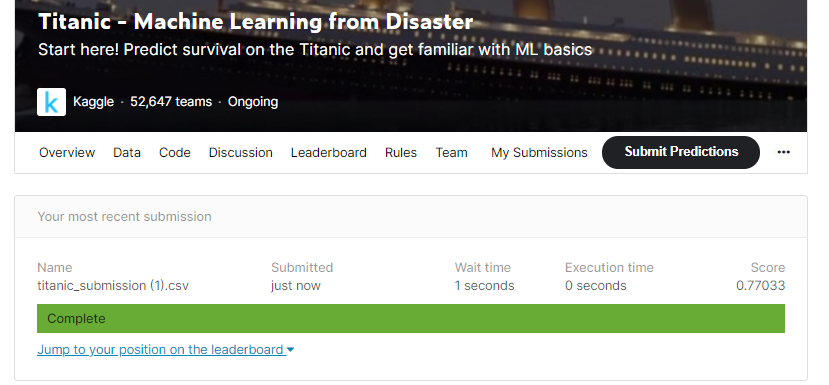